# 모듈 임포팅

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

# Keras DNN 최소 코드


# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

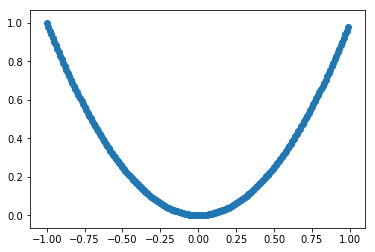

In [0]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [0]:
print(len(x))
print(x.shape)


200
(200,)


## 최소 코드

아래의 코드는 최소 코드.

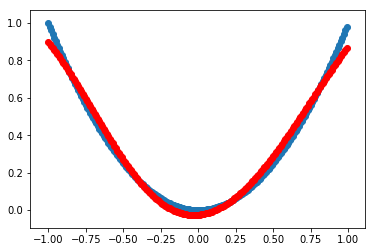

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

200/200 [==============================] - 0s 203us/sample - loss: 6.3815e-04 - mean_squared_error: 6.3815e-04
loss= 0.0006381518929265439
mse= 0.0006381519


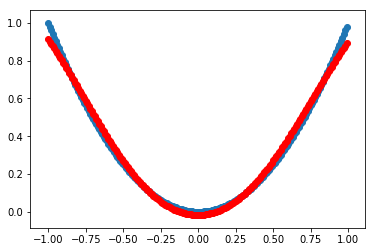

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) ))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mse = model.evaluate(x, y) # ADD
print("loss=",loss) # ADD
print("mse=",mse) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mse가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

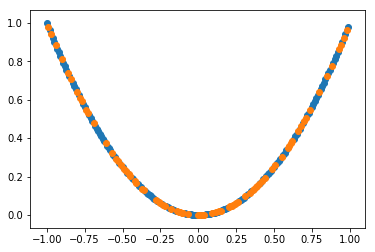

In [0]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

80/80 [==============================] - 0s 428us/sample - loss: 0.0022 - mean_squared_error: 0.0022
loss= 0.002159204240888357
mse= 0.0021592043


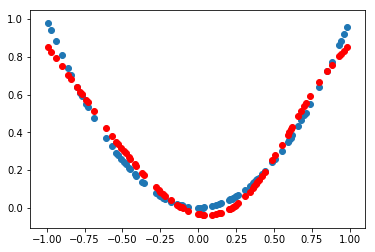

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

## Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.


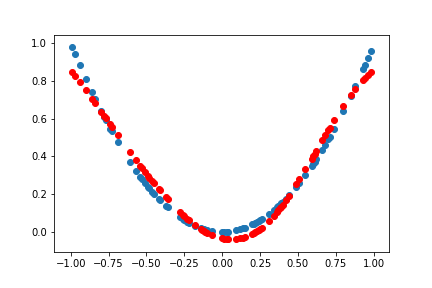

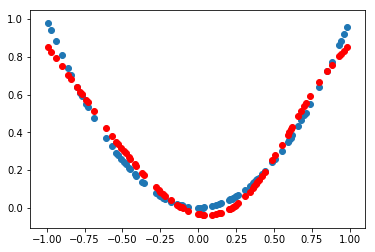

In [0]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))

## 학습 시간을 출력

elapsed : 16.960872411727905
80/80 [==============================] - 0s 463us/sample - loss: 0.0025 - mean_squared_error: 0.0025
loss= 0.0024685786105692387
mse= 0.0024685785


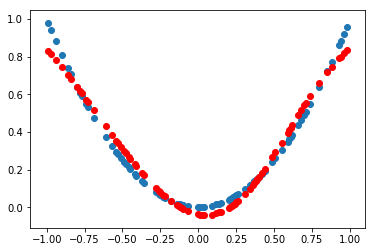

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.029454469680786


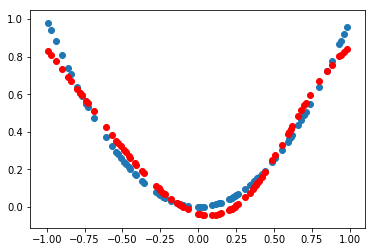

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.042150259017944
80/80 [==============================] - 0s 524us/sample - loss: 0.0031 - mean_squared_error: 0.0031
loss= 0.003101612813770771
mse= 0.003101613


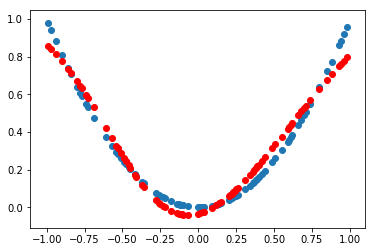

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


# 모델 정의
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

1개의 경우 거의 학습이 되지 않는다.

# 학습 추가 진행

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

In [0]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

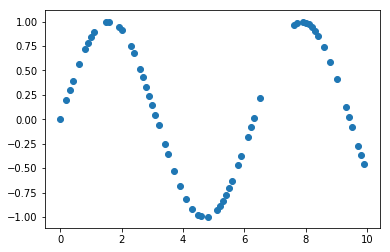

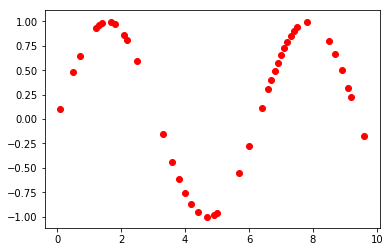

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.029408693313599
40/40 [==============================] - 0s 1ms/sample - loss: 0.1624 - mean_squared_error: 0.1624
loss= 0.16241912245750428
mse= 0.16241913


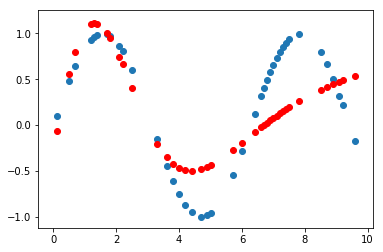

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습이 충분히 되지 않은 듯 하다.

## 추가 학습

In [0]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 6.860821008682251


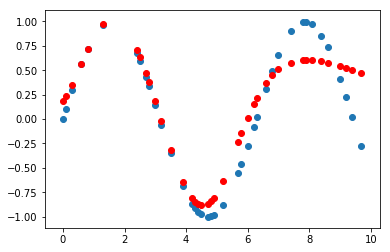

1 times fitting
elapsed : 6.830053806304932


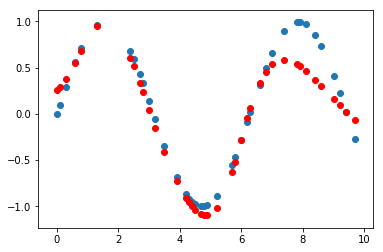

2 times fitting
elapsed : 6.776483535766602


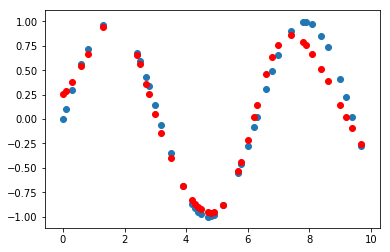

3 times fitting
elapsed : 6.757455110549927


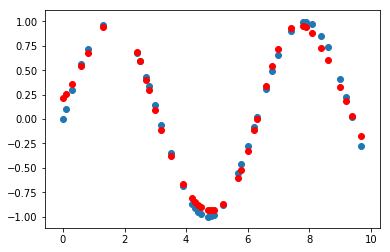

4 times fitting
elapsed : 6.848926305770874


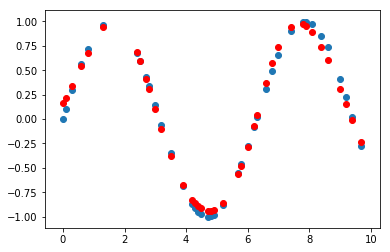

5 times fitting
elapsed : 6.840904951095581


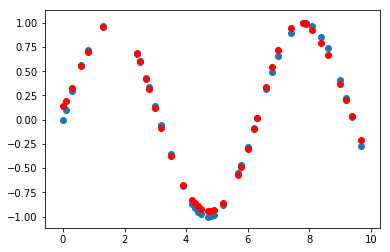

6 times fitting
elapsed : 6.881314039230347


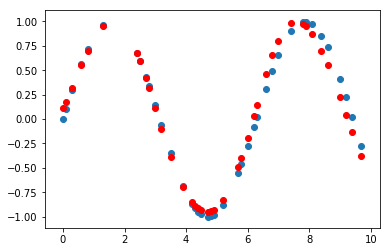

7 times fitting
elapsed : 6.782005310058594


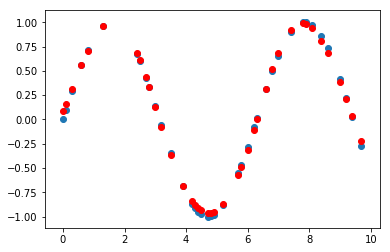

8 times fitting
elapsed : 6.755645513534546


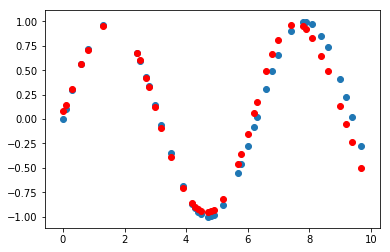

9 times fitting
elapsed : 6.758832693099976


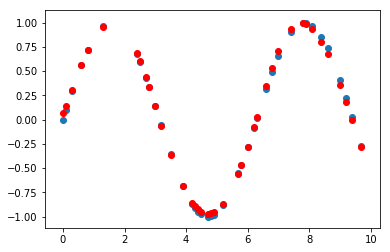

In [0]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


In [0]:
def build_model():

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

## batch_size 적용 : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 100.3012764453888


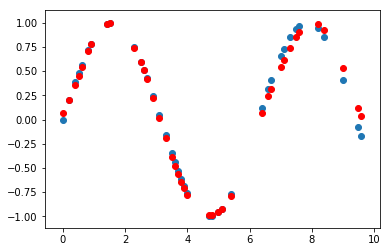

batch_size=2
elapsed : 51.838141679763794


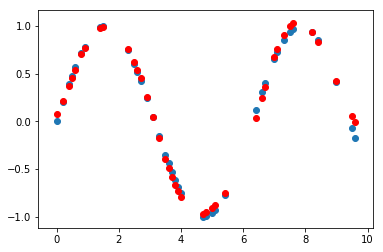

batch_size=5
elapsed : 22.21281623840332


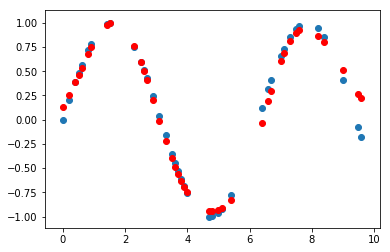

batch_size=10
elapsed : 12.134780406951904


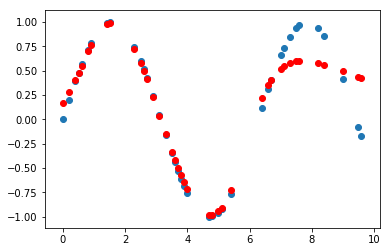

batch_size=20
elapsed : 7.339964866638184


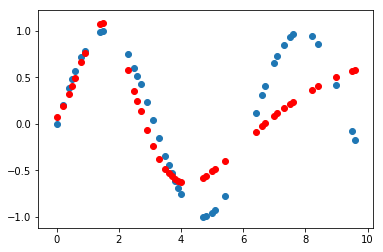

batch_size=50
elapsed : 5.389750957489014


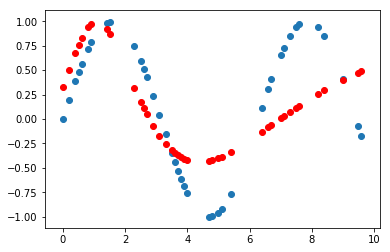

batch_size=100
elapsed : 3.670841932296753


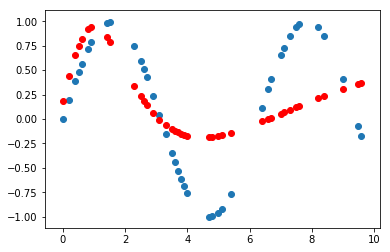

batch_size=200
elapsed : 3.6978063583374023


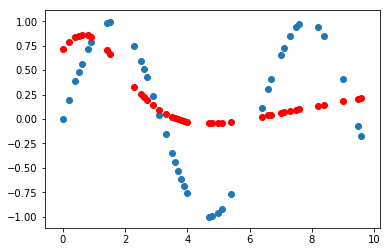

batch_size=500
elapsed : 3.7025442123413086


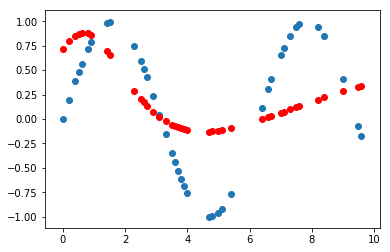

In [0]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다. 

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

# 학습 진행된 내역 보기


## model.fit()의 반환값 history

반환된 history의 loss로 진행 상황을 확인.

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_83 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.361281156539917


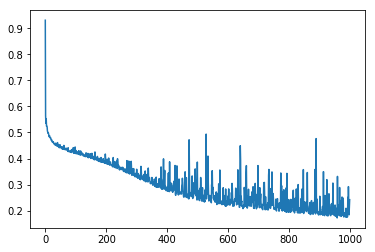

In [0]:

plt.plot(history.history['loss'])


## model.fit() verbose

- 0 : X
- 1: progress bar
- 2 : 1 line per epoch

In [0]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

print(train_x.shape)

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_89 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
60000/60000 - 6s - loss: 0.2209 - mean_squared_error: 0.2209
Epoch 2/5
60000/60000 - 5s - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3/5
60000/60000 - 5s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 4/5
60000/60000 - 5s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 5/5
60000/60000 - 5s - loss: 0.0086 - mean_squared_error: 0.0086
elapsed : 27.60842943

# 학습 시에 validation

## model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.


In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_95 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.968835353851318


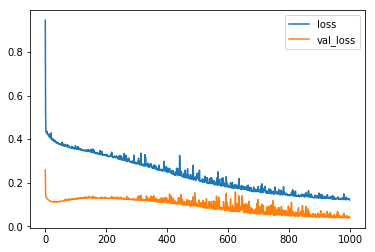

In [0]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# model.fit()의 shuffle - 학습 시의 데이터 섞기

학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_101 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.699143648147583


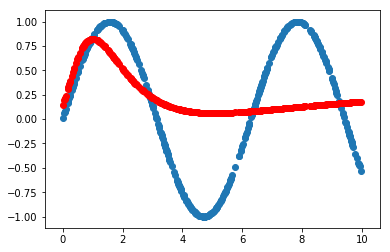

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_104 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.7709591388702393


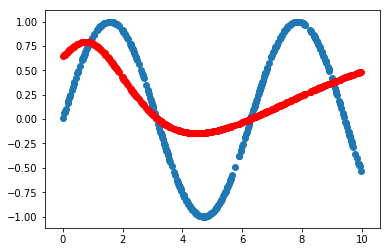

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습된 결과가 살짝 향상된 것을 볼 수 있다.

편향을 방지하기 위해서라도 항상 shuffle하는 것이 좋다.

# 모델 저장과 로딩

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_113 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.070200681686401
40/40 [==============================] - 0s 3ms/sample - loss: 0.1501 - mean_squared_error: 0.1501
loss= 0.15005545914173127
mse= 0.15005545


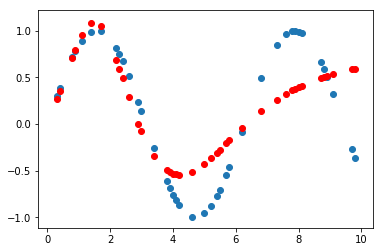

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

total 52
drwxr-xr-x 1 root root  4096 Aug 14 12:47 .
drwxr-xr-x 1 root root  4096 Aug 14 11:06 ..
-rw-r--r-- 1 root root 12510 Aug 14 11:30 base_result.png
drwxr-xr-x 1 root root  4096 Aug  7 16:05 .config
-rw-r--r-- 1 root root 19760 Aug 14 12:47 my_model.h5
drwxr-xr-x 1 root root  4096 Aug  2 16:06 sample_data


W0814 12:47:46.716366 139865081911168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0814 12:47:46.718369 139865081911168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


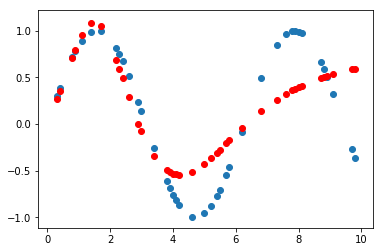

In [0]:
model.save('my_model.h5')

!ls -al

new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 복수개의 입력과 출력

## 2개의 입력, 1개의 출력

x1 + x2 -> y의 함수를 학습

x1과 x2는 0~10의 범위를 갖는다.


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_116 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 35.705761194229126
40/40 [==============================] - 0s 2ms/sample - loss: 0.0065 - mean_squared_error: 0.0065
loss= 0.006477165594696998
mse= 0.006477165


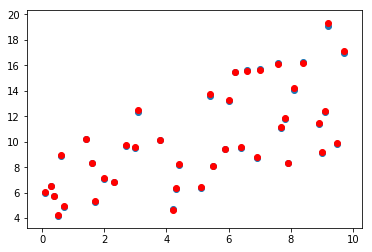

In [0]:

x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2
np.random.shuffle(x)

y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]



from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

In [0]:
print(x.shape)
print(x[:5])
print(y[:5])

(100, 2)
[[1.5 8.4]
 [8.6 5.6]
 [4.7 9.6]
 [4.9 2.7]
 [7.5 7.1]]
[ 9.9 14.2 14.3  7.6 14.6]


## 1개의 입력, 2개의 출력

다음과 같이 y는 2개의 값을 갖고, y1 = x%2, y2=x%3인 함수를 학습

```
x = np.arange(0,10,0.1)
y1 = x%2
y2 = x%3
```


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_168 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_169 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 79.75155305862427
40/40 [==============================] - 0s 7ms/sample - loss: 0.4017 - mean_squared_error: 0.4017
loss= 0.4017043113708496
mse= 0.4017043


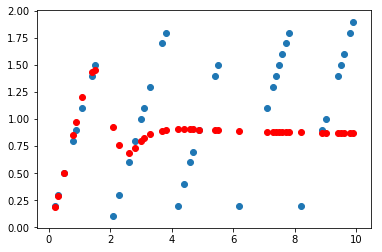

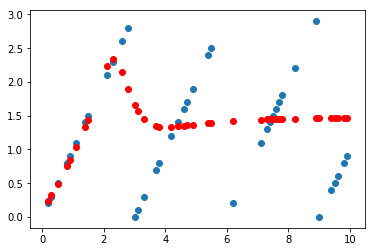

In [0]:
x = np.arange(0, 10, 0.1)
np.random.shuffle(x)
y1 = x%2
y2 = x%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x,test_y[:,0])
plt.scatter(test_x,y_[:,0], color="r")
plt.show()

plt.scatter(test_x,test_y[:,1])
plt.scatter(test_x,y_[:,1], color="r")
plt.show()


## 2개의 입력, 2개의 출력

x1 + x2 -> z, 

y1 = z%2, y2=z%3인 함수를 학습

x1과 x2는 0~10의 범위를 갖는다.

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_177 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_178 (Dense)            (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 80.7371563911438
40/40 [==============================] - 0s 7ms/sample - loss: 1.0752 - mean_squared_error: 1.0752
loss= 1.075191903114319
mse= 1.0751919


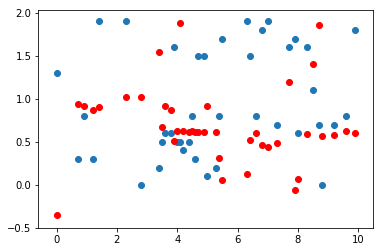

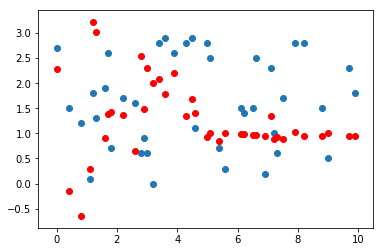

In [0]:
x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2

z = x1 + x2
y1 = z%2
y2 = z%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y[:,0])
plt.scatter(test_x.T[0],y_[:,0], color="r")
plt.show()

plt.scatter(test_x.T[1],test_y[:,1])
plt.scatter(test_x.T[1],y_[:,1], color="r")
plt.show()
